In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

In [146]:
df = pd.read_csv('detection_results.csv')
df['Detected'] = df['Detected'].apply(lambda x: True if str(x).lower() == 'true' else False if str(x).lower() == 'false' else x)

df

,Antipattern,InputFormat,Example,Model,Prompt,Detected,ImprovementQuality
0,Ambigious Service,OpenApi,Museum,GPT-4o,RB,True,2
1,Ambigious Service,OpenApi,Twilio,GPT-4o,RB,True,2
2,Missing API Versioning,OpenApi,Museum,GPT-4o,RB,True,3
3,Missing API Versioning,OpenApi,Twilio,GPT-4o,RB,False,0
4,Service Chain,PlantUML Sequence Diagram,2PC,GPT-4o,RB,False,0
...,...,...,...,...,...,...,...
103,Chatty Service,PlantUML Sequence Diagram,Ledger,Gemini 1.5 Pro,RB+CoT+Cat,True,3
104,Nanoservices,PlantUML Component Diagram,Ecommerce,Gemini 1.5 Pro,RB+CoT+Cat,False,0
105,Nanoservices,PlantUML Component Diagram,Video Processing,Gemini 1.5 Pro,RB+CoT+Cat,True,3
106,Shared Persistency,PlantUML Component Diagram,Ecommerce,Gemini 1.5 Pro,RB+CoT+Cat,True,3


In [147]:
def calculate_metrics(group):
    predictions = group['Detected']
    ground_truth = [True] * len(group)
    accuracy = accuracy_score(ground_truth, predictions)
    recall = recall_score(ground_truth, predictions)
    f1 = f1_score(ground_truth, predictions)
    return pd.Series({'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1})

metrics_by_prompt_model = df.groupby(['Prompt', 'Model']).apply(calculate_metrics)

metrics_by_prompt_model

Accuracy    Recall  F1 Score
Prompt     Model                                          
RB         Claude 3.5 Sonnet  0.333333  0.333333  0.500000
           GPT-4o             0.500000  0.500000  0.666667
           Gemini 1.5 Pro     0.583333  0.583333  0.736842
RB+CoT     Claude 3.5 Sonnet  0.666667  0.666667  0.800000
           GPT-4o             0.500000  0.500000  0.666667
           Gemini 1.5 Pro     0.250000  0.250000  0.400000
RB+CoT+Cat Claude 3.5 Sonnet  0.750000  0.750000  0.857143
           GPT-4o             0.583333  0.583333  0.736842
           Gemini 1.5 Pro     0.833333  0.833333  0.909091

In [148]:
accuracy_stats = df['Detected'].describe()
accuracy_variance = df['Detected'].var()

accuracy_stats['mean'] = df['Detected'].mean()
accuracy_stats['variance'] = accuracy_variance
accuracy_stats['std'] = df['Detected'].std()

accuracy_stats

count            108
unique             2
top             True
freq              60
mean        0.555556
variance    0.249221
std         0.499221
Name: Detected, dtype: object

## Detection Accuracy by Prompt and Model

In [149]:
numeric_detected = df['Detected'].astype(int)

grouped_stats = df.groupby(['Prompt', 'Model'])['Detected'].agg(['count', 'mean', 'std', 'var']).round(3)

grouped_stats

count   mean    std    var
Prompt     Model                                        
RB         Claude 3.5 Sonnet     12  0.333  0.492  0.242
           GPT-4o                12  0.500  0.522  0.273
           Gemini 1.5 Pro        12  0.583  0.515  0.265
RB+CoT     Claude 3.5 Sonnet     12  0.667  0.492  0.242
           GPT-4o                12  0.500  0.522  0.273
           Gemini 1.5 Pro        12  0.250  0.452  0.205
RB+CoT+Cat Claude 3.5 Sonnet     12  0.750  0.452  0.205
           GPT-4o                12  0.583  0.515  0.265
           Gemini 1.5 Pro        12  0.833  0.389  0.152

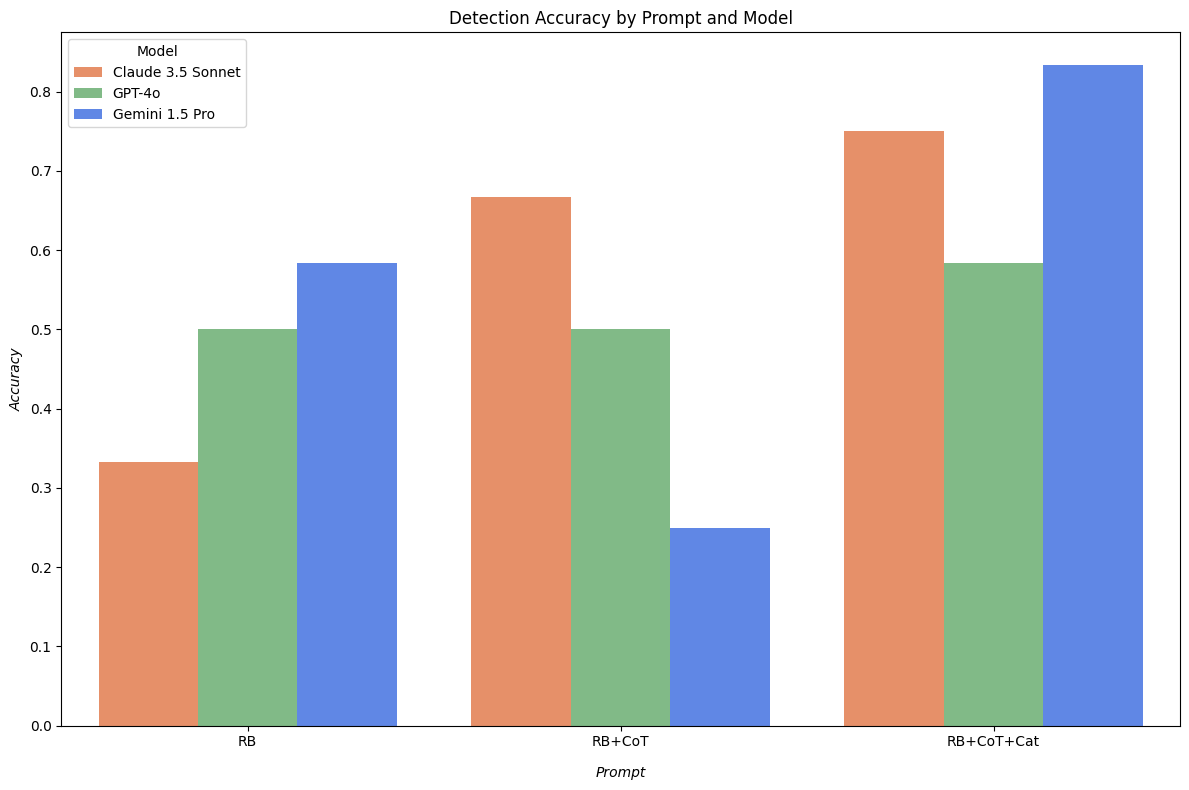

In [150]:
sns_data_prompt_model = df.groupby(['Prompt', 'Model'])['Detected'].mean().reset_index()

prompt_order = ['RB', 'RB+CoT', 'RB+CoT+Cat']
model_colors = {'GPT-4o': '#77C37F', 'Claude 3.5 Sonnet': '#fb8854', 'Gemini 1.5 Pro': '#4a7efb'}

plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt', y='Detected', hue='Model', data=sns_data_prompt_model, order=prompt_order, palette=model_colors)
plt.title('Detection Accuracy by Prompt and Model')
plt.xlabel('Prompt', fontstyle='italic', labelpad=12)
plt.ylabel('Accuracy', fontstyle='italic')
plt.tight_layout()
plt.show()

## Detection Accuracy by Prompt

In [151]:
numeric_detected = df['Detected'].astype(int)

prompt_grouped_stats = df.groupby(['Prompt'])['Detected'].agg(['count', 'mean', 'std', 'var']).round(3)

prompt_grouped_stats

,count,mean,std,var
Prompt,,,,
RB,36,0.472,0.506,0.256
RB+CoT,36,0.472,0.506,0.256
RB+CoT+Cat,36,0.722,0.454,0.206


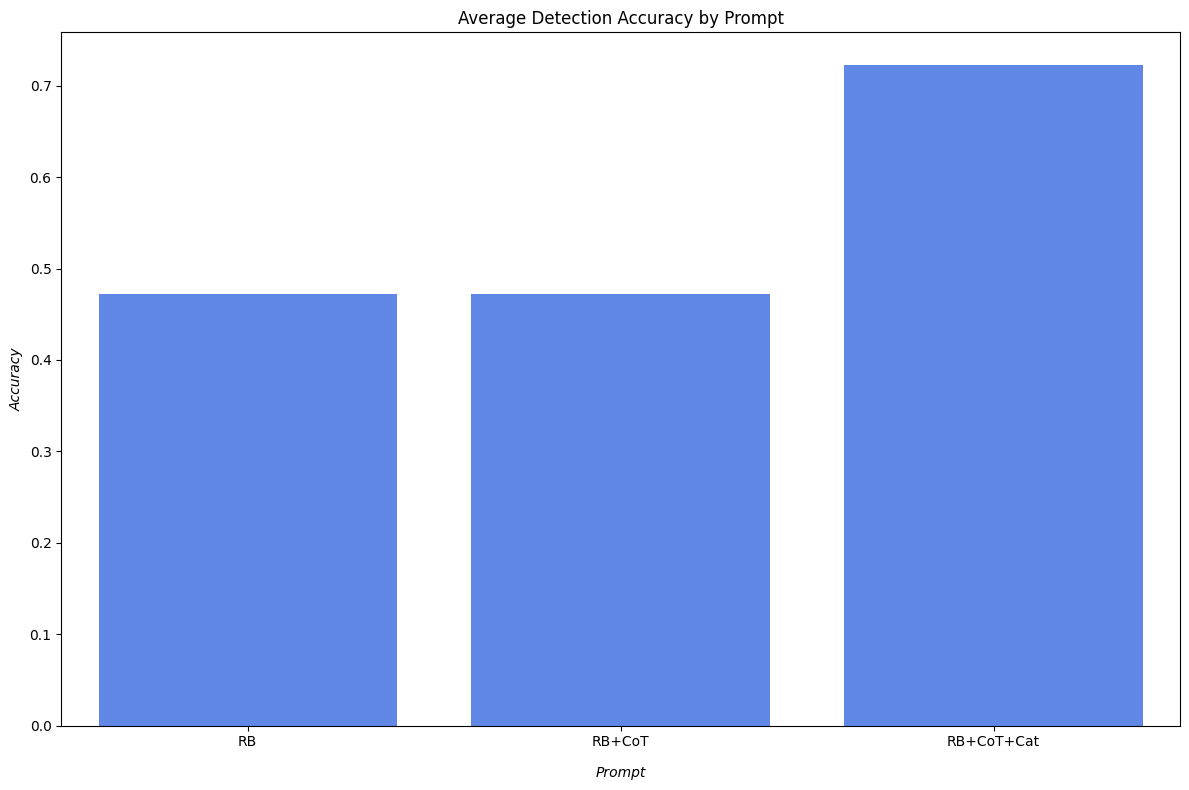

In [152]:
accuracy_prompt = df.groupby(["Prompt"])["Detected"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt', y='Detected', data=accuracy_prompt, order=prompt_order, color='#4a7efb')
plt.title('Average Detection Accuracy by Prompt')
plt.xlabel('Prompt', fontstyle='italic', labelpad=12)
plt.ylabel('Accuracy', fontstyle='italic')
plt.tight_layout()
plt.show()

## Detection Accuracy by Model

In [153]:
prompt_grouped_stanumeric_detected = df['Detected'].astype(int)

model_grouped_stats = df.groupby(['Model'])['Detected'].agg(['count', 'mean', 'std', 'var']).round(3)

model_grouped_stats

,count,mean,std,var
Model,,,,
Claude 3.5 Sonnet,36,0.583,0.500,0.250
GPT-4o,36,0.528,0.506,0.256
Gemini 1.5 Pro,36,0.556,0.504,0.254


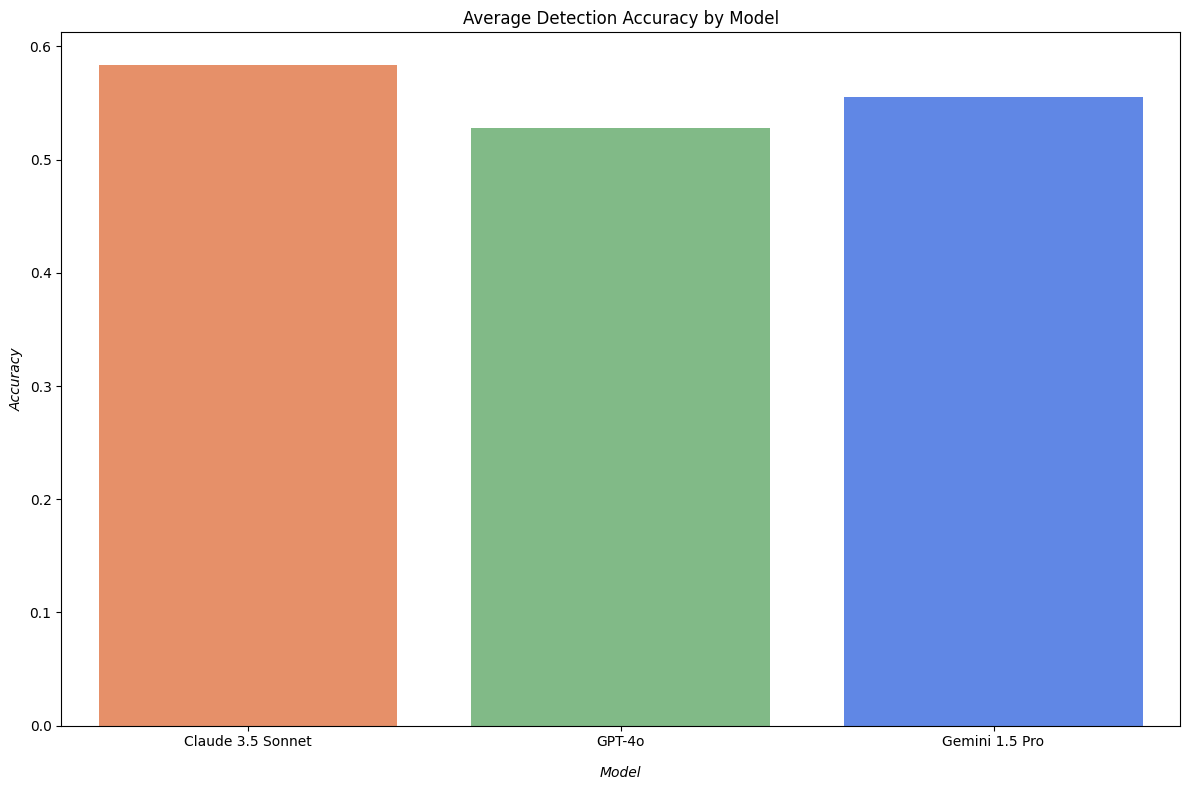

In [154]:
accuracy_prompt = df.groupby(["Model"])["Detected"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Detected', hue="Model", data=accuracy_prompt, palette=model_colors)
plt.title('Average Detection Accuracy by Model')
plt.xlabel('Model', fontstyle='italic', labelpad=12)
plt.ylabel('Accuracy', fontstyle='italic')
plt.tight_layout()
plt.show()

## Detection Accuracy by Antipattern

In [155]:
accuracy_stats_by_antipattern = df.groupby("Antipattern")["Detected"].agg(
    mean="mean", 
    std="std", 
    var="var"
).reset_index()

accuracy_stats_by_antipattern

,Antipattern,mean,std,var
0,Ambigious Service,0.666667,0.485071,0.235294
1,Chatty Service,0.722222,0.460889,0.212418
2,Missing API Versioning,0.500000,0.514496,0.264706
3,Nanoservices,0.444444,0.511310,0.261438
4,Service Chain,0.222222,0.427793,0.183007
5,Shared Persistency,0.777778,0.427793,0.183007


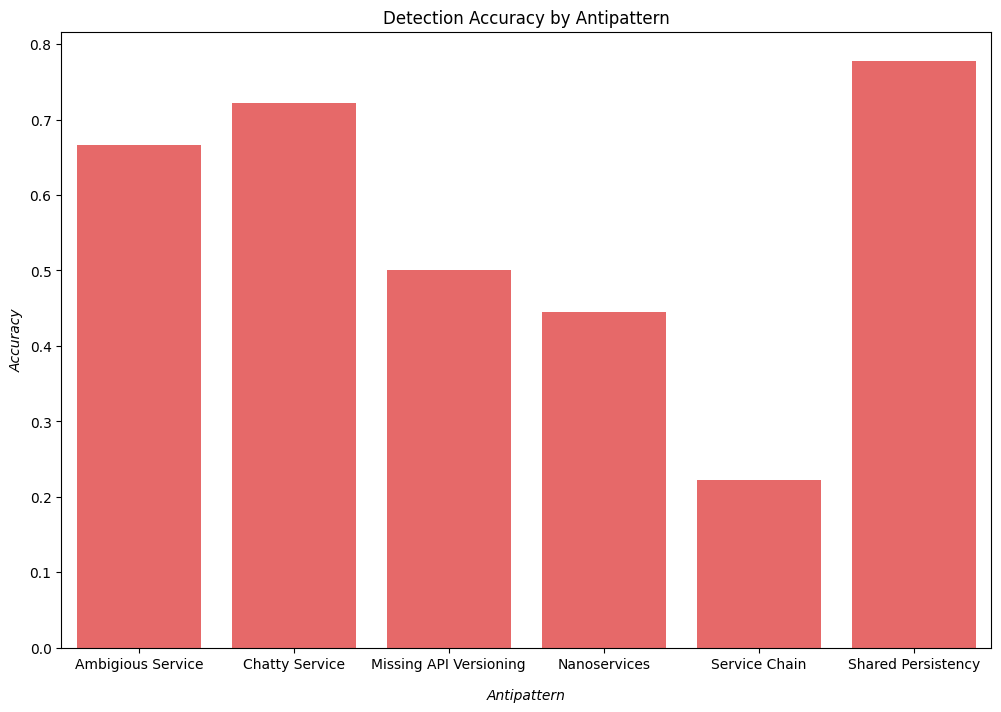

In [156]:
accuracy_by_antipattern = df.groupby("Antipattern")["Detected"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Antipattern', y='Detected', data=accuracy_by_antipattern, color='#fb5454')
plt.title('Detection Accuracy by Antipattern')
plt.xlabel("Antipattern", fontstyle='italic', labelpad=12)
plt.ylabel("Accuracy", fontstyle='italic')
plt.show()

## Detection accuracy by input format

In [157]:
accuracy_stats_by_inputformat = df.groupby("InputFormat")["Detected"].agg(
    mean="mean", 
    std="std", 
    var="var"
).reset_index()

accuracy_stats_by_inputformat

,InputFormat,mean,std,var
0,OpenApi,0.583333,0.500000,0.250000
1,PlantUML Component Diagram,0.611111,0.494413,0.244444
2,PlantUML Sequence Diagram,0.472222,0.506309,0.256349


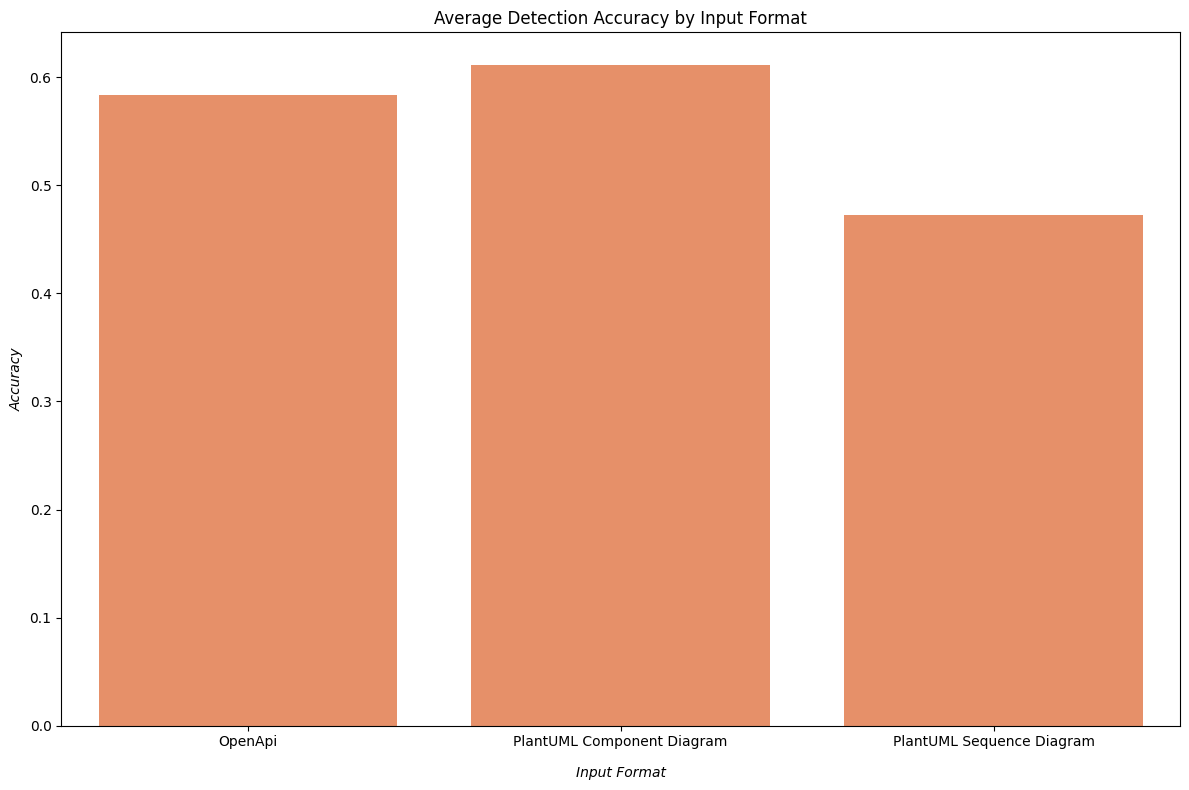

In [158]:
accuracy_prompt = df.groupby(["InputFormat"])["Detected"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='InputFormat', y='Detected', data=accuracy_prompt, color='#fb8854')
plt.title('Average Detection Accuracy by Input Format')
plt.xlabel('Input Format', fontstyle='italic', labelpad=12)
plt.ylabel('Accuracy', fontstyle='italic')
plt.tight_layout()
plt.show()

# Improvement Quality
The visualizations presented in this section are based on highly subjective evaluations and should be interpreted with caution.  
The specific numbers are not intended to be taken as precise metrics but rather as a general indication of observed trends.   
The primary purpose of these visualizations is to provide a rough overview of the improvement quality across different prompts and models.

## Improvement Quality by Prompt and Model

In [159]:
improvement_suggestion_df = df[df['ImprovementQuality'] > 0]

improvement_suggestion_mean = improvement_suggestion_df
improvement_suggestion_mean = improvement_suggestion_mean.groupby(['Prompt', 'Model'])['ImprovementQuality']
improvement_suggestion_mean = improvement_suggestion_mean.mean().reset_index()
improvement_suggestion_mean

,Prompt,Model,ImprovementQuality
0,RB,Claude 3.5 Sonnet,2.750000
1,RB,GPT-4o,2.500000
2,RB,Gemini 1.5 Pro,2.714286
3,RB+CoT,Claude 3.5 Sonnet,2.750000
4,RB+CoT,GPT-4o,2.500000
5,RB+CoT,Gemini 1.5 Pro,3.000000
6,RB+CoT+Cat,Claude 3.5 Sonnet,2.555556
7,RB+CoT+Cat,GPT-4o,3.000000
8,RB+CoT+Cat,Gemini 1.5 Pro,2.800000


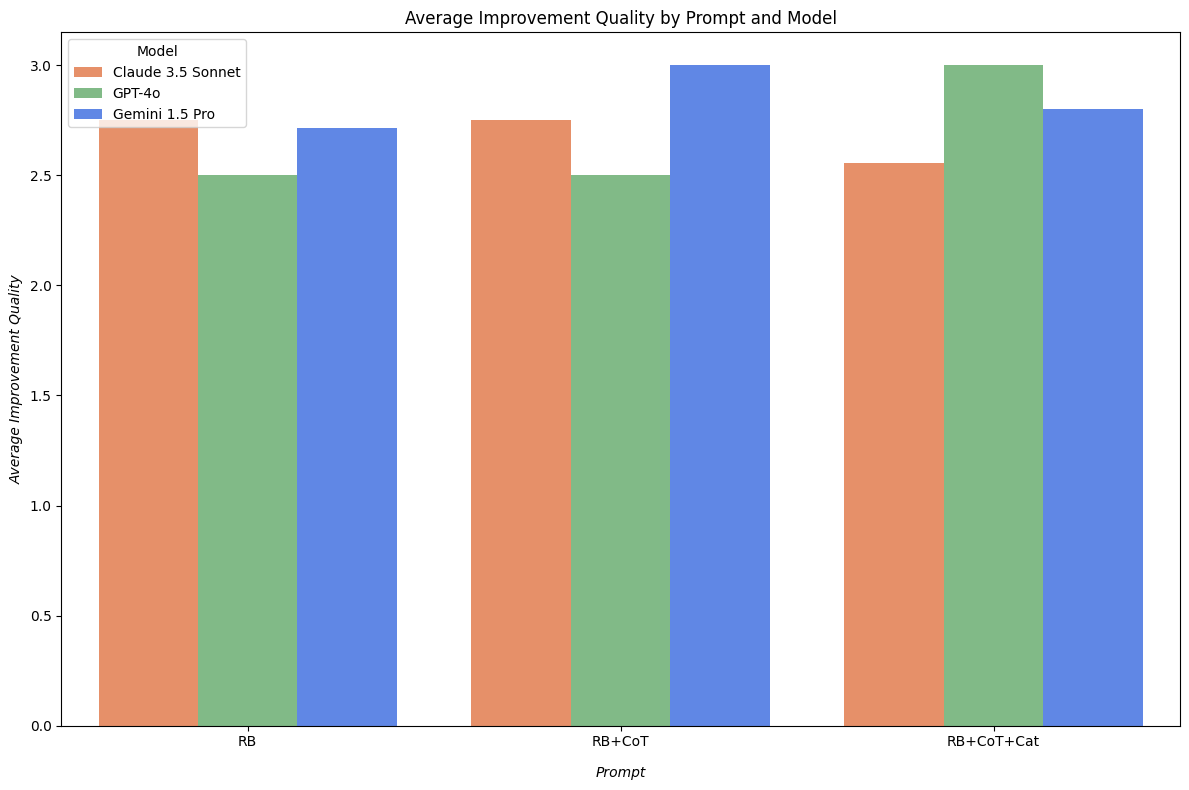

In [160]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt', y='ImprovementQuality', hue='Model', data=improvement_suggestion_mean, order=prompt_order, palette=model_colors)
plt.title('Average Improvement Quality by Prompt and Model')
plt.xlabel('Prompt', fontstyle='italic', labelpad=12)
plt.ylabel('Average Improvement Quality', fontstyle='italic')
plt.tight_layout()
plt.show()

In [161]:
def quality_label(value):
    if value == 1:
        return 'Basic'
    elif value == 2:
        return 'Moderate'
    elif value == 3:
        return 'Insightful'
    
colors = {
    'Basic': '#fb5454',
    'Moderate': '#fb8854',
    'Insightful': '#77C37F'
}

improvement_suggestion_labeled = df[df['ImprovementQuality'] > 0]
improvement_suggestion_labeled['QualityLabel'] = improvement_suggestion_labeled['ImprovementQuality'].apply(quality_label)

/tmp/ipykernel_6086/2733637891.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improvement_suggestion_labeled['QualityLabel'] = improvement_suggestion_labeled['ImprovementQuality'].apply(quality_label)


In [162]:
sum_by_label = improvement_suggestion_labeled.groupby(['QualityLabel']).size().reset_index(name='Count')

sum_by_label

,QualityLabel,Count
0,Basic,2
1,Insightful,45
2,Moderate,13


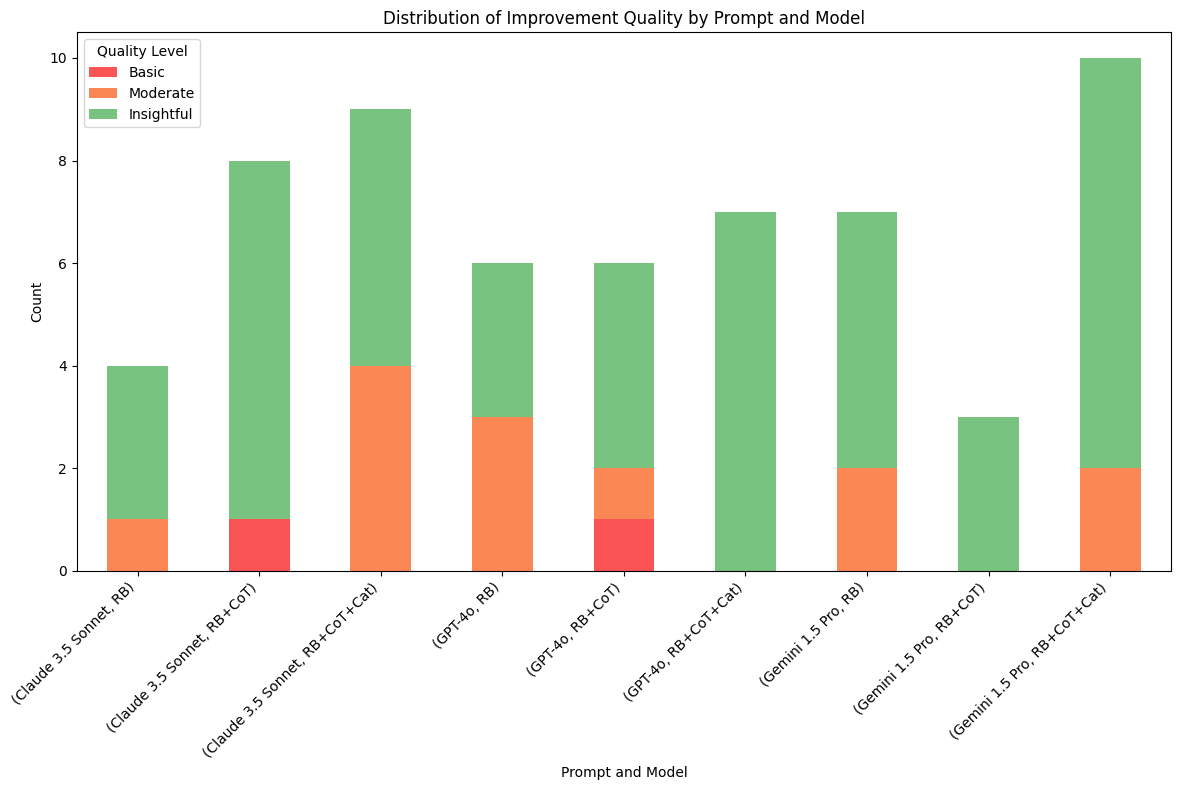

In [163]:
grouped = improvement_suggestion_labeled.groupby(['Model', 'Prompt', 'QualityLabel']).size().reset_index(name='Count')

pivot = grouped.pivot(index=['Model', 'Prompt'], columns='QualityLabel', values='Count').fillna(0)
pivot = pivot[['Basic', 'Moderate', 'Insightful']]

pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in pivot.columns])
plt.title('Distribution of Improvement Quality by Prompt and Model')
plt.ylabel('Count')
plt.xlabel('Prompt and Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Level')
plt.tight_layout()
plt.show()

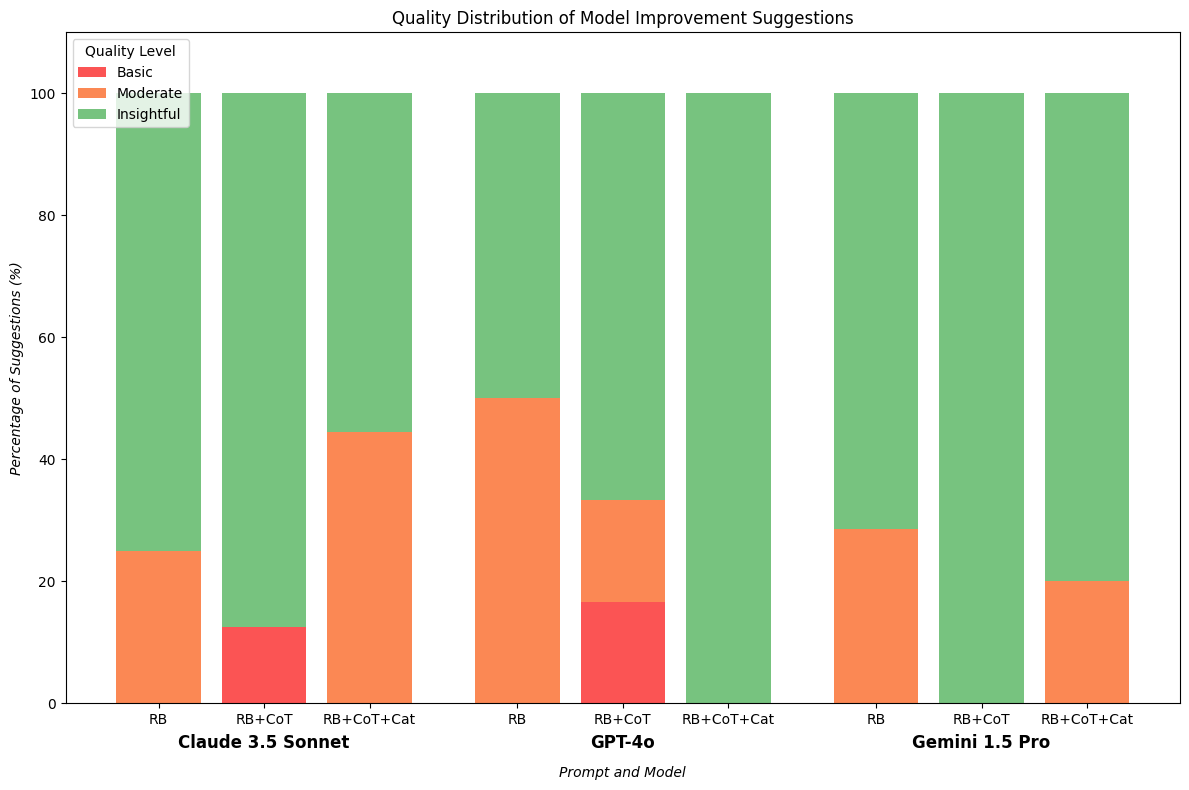

In [173]:
grouped = improvement_suggestion_labeled.groupby(['Model', 'Prompt', 'QualityLabel']).size()
pivot = grouped.reset_index(name='Count').pivot(index=['Model', 'Prompt'], columns='QualityLabel', values='Count').fillna(0)

column_order = ['Basic', 'Moderate', 'Insightful']

# Normalize by detection totals
detection_totals = pivot.sum(axis=1)
normalized_by_detections = pivot.div(detection_totals, axis=0) * 100

normalized_by_detections = normalized_by_detections.reindex(
    index=pd.MultiIndex.from_product([
        normalized_by_detections.index.get_level_values('Model').unique(),
        prompt_order
    ], names=['Model', 'Prompt'])
)


prompts = normalized_by_detections.index.get_level_values('Prompt')
models = normalized_by_detections.index.get_level_values('Model').unique()

fig, ax = plt.subplots(figsize=(12, 8))


gap_size = 0.4
positions = []
current_position = 0

for model in models:
    model_mask = normalized_by_detections.index.get_level_values('Model') == model
    model_data = normalized_by_detections[model_mask]
    group_size = int(sum(model_mask))
    positions.extend([current_position + i for i in range(group_size)])

    current_position += group_size + gap_size

bar_positions = np.array(positions)

bottom = np.zeros(len(normalized_by_detections))
for col in column_order:
    if col in normalized_by_detections.columns:
        ax.bar(bar_positions, normalized_by_detections[col], bottom=bottom, 
               label=col, color=colors[col])
        bottom += normalized_by_detections[col]

ax.set_xticks(bar_positions)
ax.set_xticklabels(prompts, rotation=0, ha='center')

model_start_indices = [normalized_by_detections.index.get_level_values('Model').tolist().index(model) for model in models]
model_end_indices = [i + len(normalized_by_detections[normalized_by_detections.index.get_level_values('Model') == model]) - 1 for i, model in zip(model_start_indices, models)]

for model, start, end in zip(models, model_start_indices, model_end_indices):
    ax.text(
        x=bar_positions[start] + (bar_positions[end] - bar_positions[start]) / 2,
        y=-5,
        s=model,
        ha='center',
        va='top',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Quality Distribution of Model Improvement Suggestions')
plt.ylabel('Percentage of Suggestions (%)', fontstyle='italic')
plt.xlabel('Prompt and Model', fontstyle='italic', labelpad=28)
plt.ylim(0, 110)
plt.legend(title='Quality Level', loc='upper left')
plt.tight_layout()
plt.show()

## Improvement Quality by Model

In [165]:
quality_by_model = improvement_suggestion_df.groupby("Model")["ImprovementQuality"].mean().reset_index()
quality_by_model

,Model,ImprovementQuality
0,Claude 3.5 Sonnet,2.666667
1,GPT-4o,2.684211
2,Gemini 1.5 Pro,2.800000


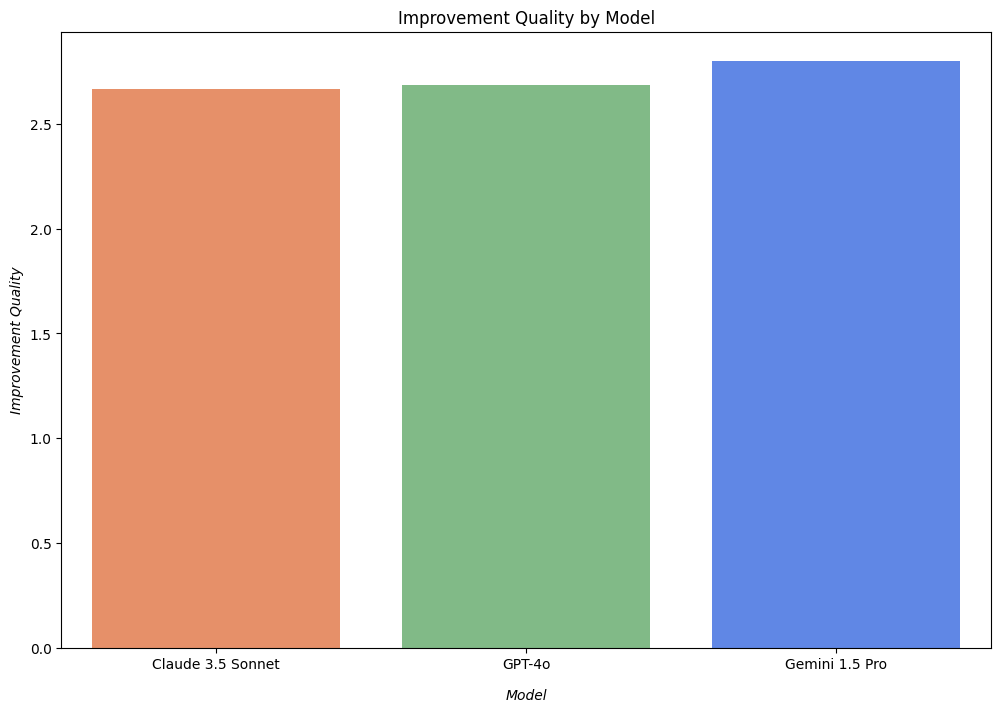

In [166]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='ImprovementQuality', data=quality_by_model, hue="Model", palette=model_colors)
plt.title('Improvement Quality by Model')
plt.xlabel("Model", fontstyle='italic', labelpad=12)
plt.ylabel("Improvement Quality", fontstyle='italic')
plt.show()

## Improvement Quality by Prompt

In [167]:
quality_by_prompt = improvement_suggestion_df.groupby("Prompt")["ImprovementQuality"].mean().reset_index()
quality_by_prompt

,Prompt,ImprovementQuality
0,RB,2.647059
1,RB+CoT,2.705882
2,RB+CoT+Cat,2.769231


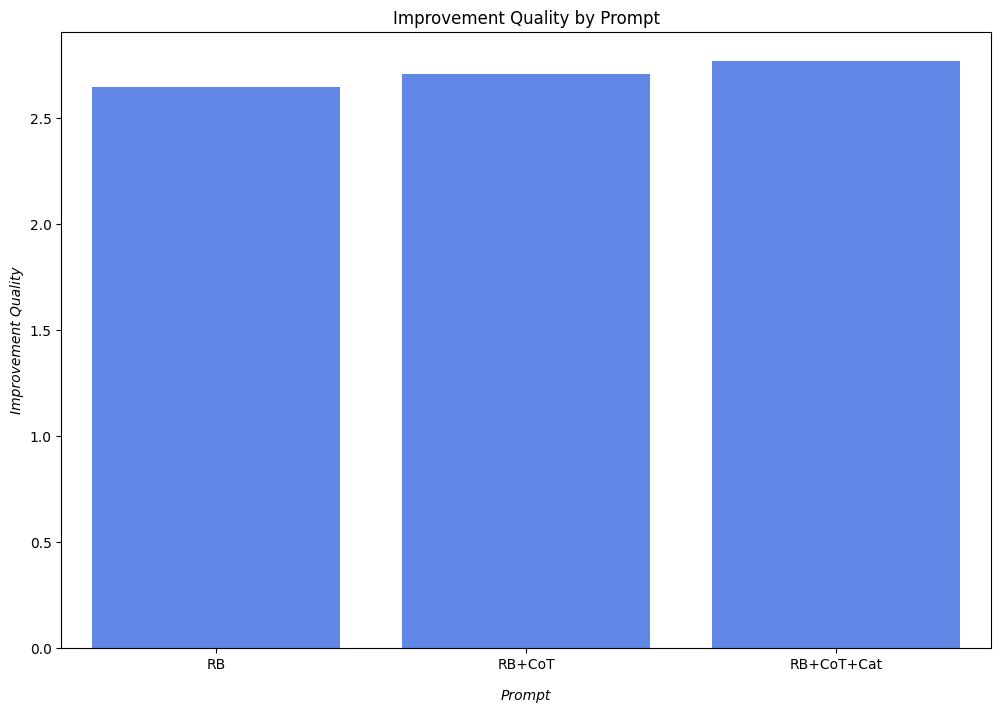

In [168]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt', y='ImprovementQuality', data=quality_by_prompt, order=prompt_order, color='#4a7efb')
plt.title('Improvement Quality by Prompt')
plt.xlabel("Prompt", fontstyle='italic', labelpad=12)
plt.ylabel("Improvement Quality", fontstyle='italic')
plt.show()

## Improvement Quality by Antipattern

In [169]:
quality_by_antipattern = improvement_suggestion_df.groupby("Antipattern")["ImprovementQuality"].mean().reset_index()
quality_by_antipattern

,Antipattern,ImprovementQuality
0,Ambigious Service,2.416667
1,Chatty Service,2.923077
2,Missing API Versioning,2.888889
3,Nanoservices,2.625000
4,Service Chain,1.750000
5,Shared Persistency,3.000000


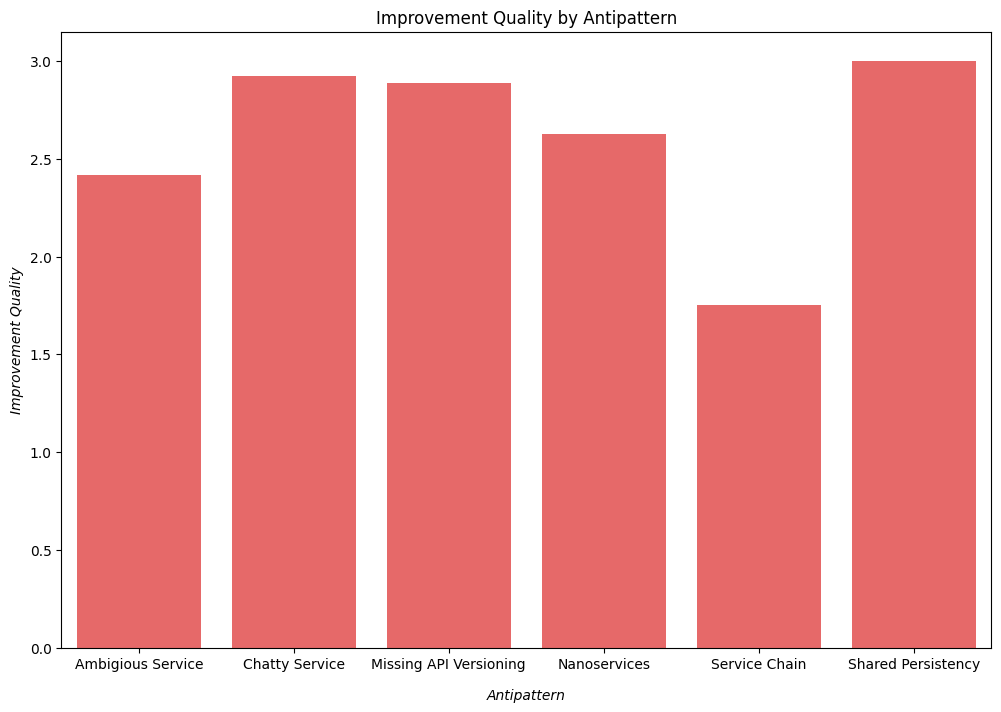

In [170]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Antipattern', y='ImprovementQuality', data=quality_by_antipattern, color="#fb5454")
plt.title('Improvement Quality by Antipattern')
plt.xlabel("Antipattern", fontstyle='italic', labelpad=12)
plt.ylabel("Improvement Quality", fontstyle='italic')
plt.show()

## Improvement Quality by Input Format

In [171]:
quality_by_inputformat = improvement_suggestion_df.groupby("InputFormat")["ImprovementQuality"].mean().reset_index()
quality_by_inputformat

,InputFormat,ImprovementQuality
0,OpenApi,2.619048
1,PlantUML Component Diagram,2.863636
2,PlantUML Sequence Diagram,2.647059


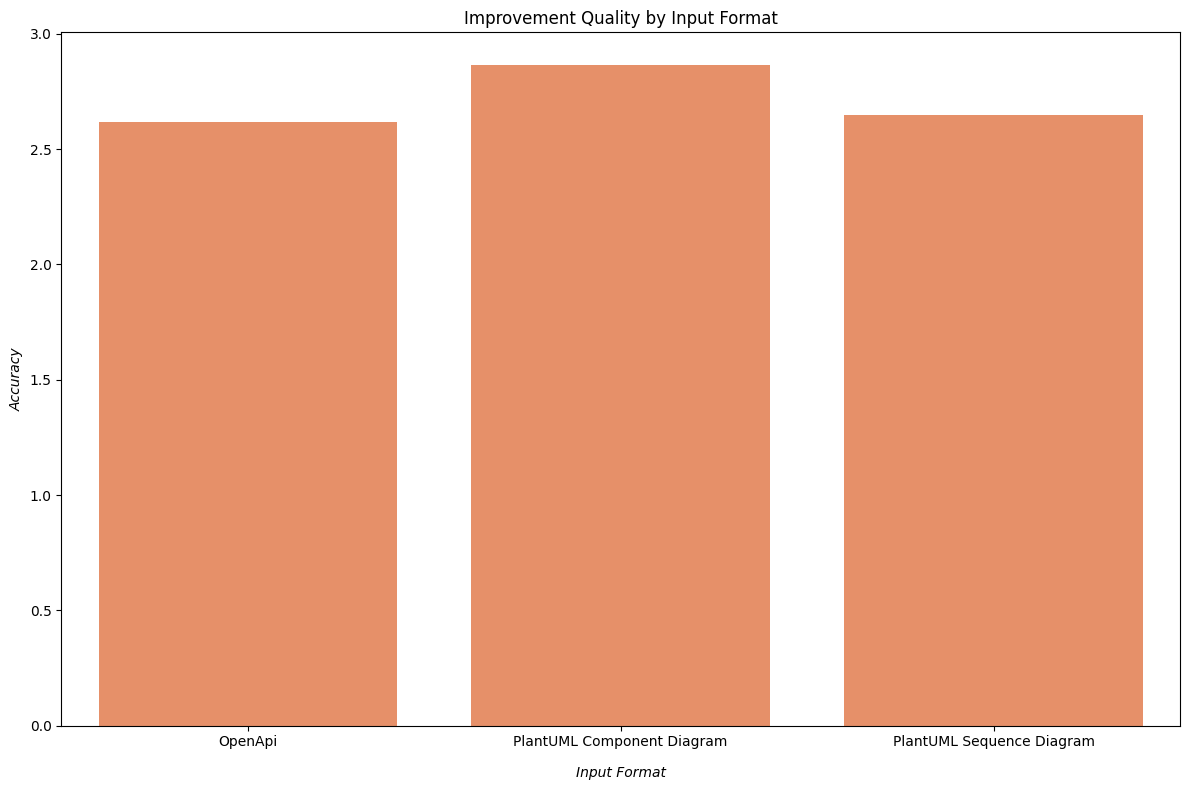

In [172]:
plt.figure(figsize=(12, 8))
sns.barplot(x='InputFormat', y='ImprovementQuality', data=quality_by_inputformat, color="#fb8854")
plt.title('Improvement Quality by Input Format')
plt.xlabel('Input Format', fontstyle='italic', labelpad=12)
plt.ylabel('Accuracy', fontstyle='italic')
plt.tight_layout()
plt.show()